## LSTM Experiment
Insert Code wherever represented with "#***************#"

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
#numpy.random.seed(7)

2024-11-28 22:11:57.169733: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 22:11:57.173252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 22:11:57.184142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732812117.210690   76769 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732812117.216498   76769 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 22:11:57.246864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
top_words = 5000
"""
    Load the IMDB Movie Review dataset and train them into train and split from imdb.load_dataset
    Also mention the num_words parameter as top_words
"""
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [3]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [4]:
# truncate and/or pad input sequences
max_review_length = 400
"""
    Apply padding to both X_train and x_test variables with above mentioned max_review_length
"""
X_train = pad_sequences(X_train, maxlen=max_review_length) 
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [5]:
import tensorflow as tf
# Create the model

embedding_vector_length = 32

"""
    Create LSTM Model using following Layers:
    1. Embedding Layer
    2. LSTM with 10 neurons
    3. Dense Layer with sigmoid activation for Output
"""
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

/home/ninet33n/Desktop/clg/prac/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-11-28 22:12:06.186517: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
"""
    Compile the model using following criteria:
    compile(loss, optimizer, metrics=['accuracy'])
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

"""
    Print Accuracy acheived by model using the above created scores variable
"""
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.5986 - loss: 0.6749 - val_accuracy: 0.8035 - val_loss: 0.4829
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.8225 - loss: 0.4385 - val_accuracy: 0.8188 - val_loss: 0.4230
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.8637 - loss: 0.3503 - val_accuracy: 0.8612 - val_loss: 0.3435
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.8966 - loss: 0.2833 - val_accuracy: 0.8705 - val_loss: 0.3237
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.9124 - loss: 0.2430 - val_accuracy: 0.8737 - val_loss: 0.3202
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.9267 - loss: 0.2138 - val_accuracy: 0.8716 - val_loss: 0.3295
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.9322 - loss: 0.1997 - val_accuracy: 0.8747 - val_loss: 0.3164
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.9454 - loss: 0.1718 - val_accu

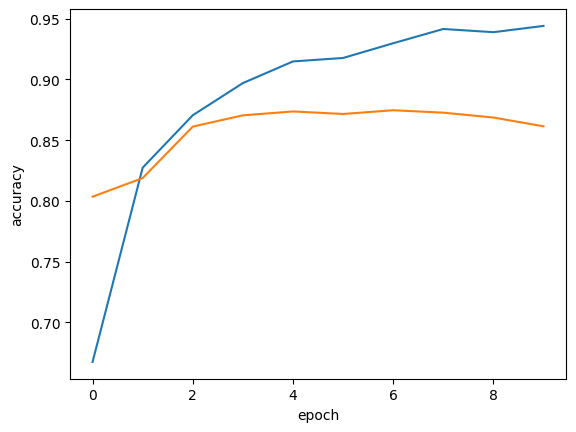

In [11]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs Accuracy
"""
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

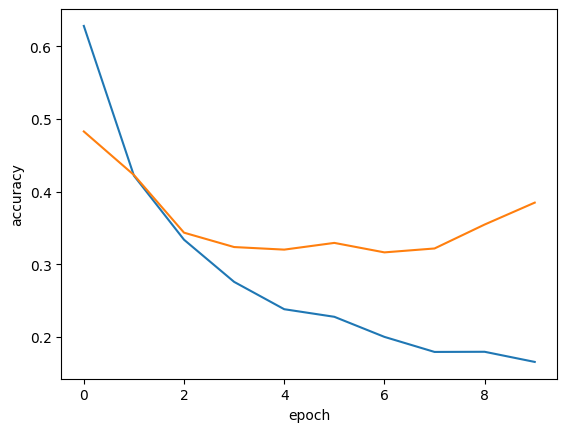

In [12]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs loss
"""
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
pred=model.predict(X_test)
print(pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step
[[0.0348975 ]
 [0.98628795]
 [0.12608169]
 ...
 [0.02880938]
 [0.08297317]
 [0.3270273 ]]
